In [1]:
from fastai.data.external import untar_data, URLs

path = untar_data(URLs.MNIST_SAMPLE)
path.ls() # type: ignore

(#3) [Path('/Users/mton/.fastai/data/mnist_sample/valid'),Path('/Users/mton/.fastai/data/mnist_sample/labels.csv'),Path('/Users/mton/.fastai/data/mnist_sample/train')]

In [2]:
(path/'train').ls() # type: ignore

(#2) [Path('/Users/mton/.fastai/data/mnist_sample/train/7'),Path('/Users/mton/.fastai/data/mnist_sample/train/3')]

In [3]:
threes = (path/'train'/'3').ls().sorted() # type: ignore
sevens = (path/'train'/'7').ls().sorted() # type: ignore
threes # type: ignore

(#6131) [Path('/Users/mton/.fastai/data/mnist_sample/train/3/10.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10000.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10011.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10031.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10034.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10042.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10052.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/1007.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10074.png'),Path('/Users/mton/.fastai/data/mnist_sample/train/3/10091.png')...]

In [13]:
from fastai.vision.all import Image

# TODO : Why does three[0] display an image, but array/tensor are all Zeroes?
img3_path = threes[1]
im3 = Image.open(img3_path)
im3 # type: ignore

In [14]:
from fastai.vision.data import array

array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
from fastai.vision.data import tensor

tensor(im3)[4:10, 4:10]

In [37]:
from fastai.vision.data import pd

im3_t = tensor(im3)
# TODO : I brute forced the 4:26, 4:22 to get the right size. Why?
# FYI the full image is 28x28 for a total of 784 pixels
df = pd.DataFrame(im3_t[4:26, 4:22]) # type: ignore
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [41]:
seven_tensors = [tensor(Image.open(o)) for o in sevens] # type: ignore
three_tensors = [tensor(Image.open(o)) for o in threes] # type: ignore

print(f"seven [{len(three_tensors)}] three [{len(seven_tensors)}]")

seven [6131] three [6265]


<AxesSubplot:>

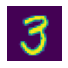

In [44]:
from fastai.vision.data import show_image

show_image(three_tensors[1])

In [51]:
from fastai.vision.data import torch

stacked_threes = torch.stack(three_tensors).float()/255 # type: ignore
stacked_sevens = torch.stack(seven_tensors).float()/255 # type: ignore

# IMPORTANT : commit tensor (1) shape and (2) rank(not dimension) to memory
# Why rank != dimension? 3D position is a 3D vector, but rank is 1 ... leads to rank/dimension word mismatch
# shape is the length of each axis
# stacked_threes shape is => 61631 images, 28 x pixels, 28 y pixels
stacked_threes.shape


torch.Size([6131, 28, 28])

In [52]:
# rank is the number of axes in a tensor, shape is the lenght/size of each axis
# stacked_threes rank is 3 axes => (num of images, x pixels, y pixels)
len(stacked_threes.shape)
# alternative way to get rank
# stacked_threes.ndim # number of dimensions add to word mismatch

3

<AxesSubplot:>

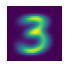

In [54]:
mean3 = stacked_threes.mean(0) # type: ignore
# This is what peak number 3 looks like lol
# output is wispy and willowy where images disagree and solid where they agree
# Just like Tesla FSD Beta visualization lol
# TODO : verify that mean == average; also difference between mean, median and mode
show_image(mean3)

<AxesSubplot:>

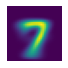

In [55]:
mean7 = stacked_sevens.mean(0) # type: ignore
show_image(mean7)

<AxesSubplot:>

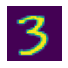

In [63]:
a_3 = stacked_threes[1]
show_image(a_3)

In [68]:
# diff between 3 and mean3 abs and sqr
a_3_mean3_diff = a_3 - mean3
dist_3_abs = a_3_mean3_diff.abs().mean()
dist_3_sqr = (a_3_mean3_diff**2).mean().sqrt()
print(f'abs [{dist_3_abs}] sqr [{dist_3_sqr}]')

abs [0.11143654584884644] sqr [0.20208320021629333]


In [69]:
# diff between 3 and mean7 abs and sqr
a_3_mean7_diff = a_3 - mean7
dist_7_abs = a_3_mean7_diff.abs().mean()
dist_7_sqr = (a_3_mean7_diff**2).mean().sqrt()
print(f'abs [{dist_7_abs}] sqr [{dist_7_sqr}]')

abs [0.15861910581588745] sqr [0.30210891366004944]


In [70]:
import torch.nn.functional as F
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt() # type: ignore

(tensor(0.1586), tensor(0.3021))

In [92]:
data = [[1,2,3], [4,5,6]]
arr = array(data)
tns = tensor(data)

# Perhaps the most important new coding skill for Python programmers is to use the array and tensor APIs
# printing common exercise outputs
print(f'{arr} # numpy \n{tns} # pytorch') # type: ignore
print(f'{tns[1]} # row')
print(f'{tns[:,1]} # column')
print(f'{tns[1, 1:3]} # row, column slice (end is excluded)')
print(f'{tns+1} # tns+1 standard operator +-*/ works => here we add a scalar one to each element')
print(f'{tns.type()} # tensors have a type')
print(f'{tns*1.5} # type changes as needed => here our int values are converted to float during multiplication')


[[1 2 3]
 [4 5 6]] # numpy 
tensor([[1, 2, 3],
        [4, 5, 6]]) # pytorch
tensor([4, 5, 6]) # row
tensor([2, 5]) # column
tensor([5, 6]) # row, column slice (end is excluded)
tensor([[2, 3, 4],
        [5, 6, 7]]) # tns+1 standard operator +-*/ works => here we add a scalar one to each element
torch.LongTensor # tensors have a type
tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]]) # type changes as needed => here our int values are converted to float during multiplication


In [105]:
# validation set : luckily MNIST is already split into train and valid
valid_3_files = (path/'valid'/'3').ls() # type: ignore
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in valid_3_files])
# TODO : why do we have to convert to float? since we are dividing by 255 that should auto convert to float
# maybe we want to be explicit about the conversion?
valid_3_tens = valid_3_tens.float()/255

valid_7_files = (path/'valid'/'7').ls() # type: ignore
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in valid_7_files])
valid_7_tens = valid_7_tens.float()/255

# Good habit to verify tensor SHAPES as you go
print(f'[SHAPE] 3 => {stacked_threes.shape} # training set \n[SHAPE] 7 => {stacked_sevens.shape} # training set')
print(f'[SHAPE] 3 => {valid_3_tens.shape} # validation set \n[SHAPE] 7 => {valid_7_tens.shape} # validation set')


[SHAPE] 3 => torch.Size([6131, 28, 28]) # training set 
[SHAPE] 7 => torch.Size([6265, 28, 28]) # training set
[SHAPE] 3 => torch.Size([1010, 28, 28]) # validation set 
[SHAPE] 7 => torch.Size([1028, 28, 28]) # validation set


In [109]:
def mnist_distance(a, b):
    # (a-b) is element wise subtraction; pytorch broadcasting! makes tensor code much easier to write
    # broadcasting expands the element with the smaller rank to match the larger rank
    # TODO : here a single scalar (a) is expanded to match array (b) ... but what if (a) is a vector?
    # ANSWER : it actually accumulates tensor([1,2,3]) + tensor(1) + tensor(3) = tensor([5,6,7])
    # Broadcasting is done in C on cpu or cuda on gpu and is 10ks or millions of times faster than python
    # and is the most IMPORTANT feature of pytorch

    # (-1, -2) is a tuple of x,y axes to sum over from shape (num of images (0 or -3 lol), x pixels(-2), y pixels(-1))
    # In other words for every image we averaged the intensity of all pixels in each image using mean()
    # TODO : assumes that tensor shape is 3 dimensional ... what if it is 4 dimensional? Track this implicitly?
    return (a-b).abs().mean((-1, -2))

valid_3_dist = mnist_distance(valid_3_tens, mean3)

print(f'{mnist_distance(a_3, mean3)} distance between single image [3] and single [mean3] image')
print(f'{valid_3_dist} \n{valid_3_dist.shape} # shape of valid_3_dist')


0.11143654584884644 distance between single image [3] and single [mean3] image
tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]) 
torch.Size([1010]) # shape of valid_3_dist


In [115]:
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)

is_3(a_3), is_3(a_3).float() # type: ignore
is_3(valid_3_tens) # with broadcasting we can check the entire validation set at once

tensor([True, True, True,  ..., True, True, True])

In [118]:
accuracy3s = is_3(valid_3_tens).float().mean()
accuracy7s = (1-is_3(valid_7_tens).float()).mean()

# Measuring distance between image and it's mean is a good way to classify images ...
# but to LEARN we need a way for our model to IMPROVE when updated with MORE data (0-9, not just 3 and 7)
# SGD - Stochastic Gradient Descent can test and improve (lift lol) models with WEIGHTS and BIAS
accuracy3s, accuracy7s, (accuracy3s+accuracy7s)/2 # type: ignore

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

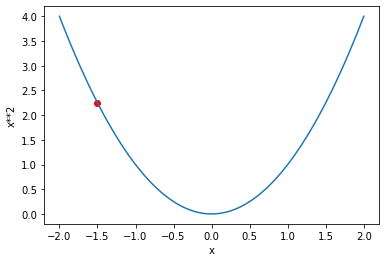

In [2]:
# TODO : didn't know that fastbook was importable, copied search_images_bing string from their earlier lol
from fastbook import plot_function
import matplotlib.pyplot as plt

def f(x):
    return x**2

plot_function(f, 'x', 'x**2')
# f(-1.5) is the y value of the red dot
plt.scatter(-1.5, f(-1.5), color='red')

In [31]:
from fastai.vision.data import torch, tensor

# picking a value where we want gradients
# requires_grad is tagging the value for pytorch to compute gradients for
xt = tensor(3.).requires_grad_()
# pytorch syntax is to focus on the arguments as opposed to the gradient function
# Can be confusing because in math and science, "gradient" of a function is another
# function (it's derivative)
# But in deep learning "gradient" is the value of a function's derivative at a 
# particular argument value, NOT the (derivative) function used to compute the gradient
# That's why pytorch uses "requires_grad_()" to tag the VALUE to compute
# Different focus, but can feel backwards
yt = f(xt)
yt # type: ignore

tensor(9., grad_fn=<PowBackward0>)

In [32]:
# TODO : running this twice errors out ... why?
# ANSWER : because we are trying to run backward() on a tensor that has already been backwarded (?)
# RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors 
# after they have already been freed). Saved intermediate values of the graph are freed when you 
# call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the 
# graph a second time or if you need to access saved tensors after calling backward.

# Here we tell pytorch to calculate the gradient for us
# "backward" refers to backpropagation, life would be easier if "backward" was just called "calculate_grad"
yt.backward()

In [33]:
# we can now view the gradients by checking the grad attribute of our tensor
# Derivative of x**2 is 2*x, and x=3 so the gradient should be 2*3 = 6
xt.grad

tensor(6.)

In [34]:
# apply pytorch gradient calculation to a vector instead of a scalar
xt = tensor([3., 4., 10.]).requires_grad_()
xt # type: ignore

tensor([ 3.,  4., 10.], requires_grad=True)

In [35]:
# update function with sum, so we take a vector (rank-1 tensor) and 
# return a scalar (rank-0 tensor)
# TODO : clarify diff rank-1 and rank-0 vs dimensions
def f_sum(x):
    return (x**2).sum()

In [36]:
# TODO: rerunning without re-init xt tensor is accumulative, why?
yt = f_sum(xt)
yt # type: ignore

tensor(125., grad_fn=<SumBackward0>)

In [37]:
yt.backward()
xt.grad # type: ignore

tensor([ 6.,  8., 20.])

time tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.]) 
speed tensor([68.7950, 55.5493, 40.7705, 32.0648, 20.1615, 17.2617, 11.6238,  9.7486,  2.2095, -0.0873,  4.0202,  2.1327,  6.2430, 13.3936, 20.1071, 25.0670, 33.4728, 40.9077, 49.0491, 64.0991])


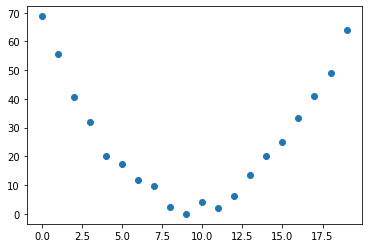

In [85]:
time = torch.arange(0, 20).float(); time #type: ignore
# add noise because measuring things manually is not precise
# this makes "what's the roller coasters speed" difficult to answer
speed = torch.randn(20)*3 + 0.75 * (time-9.5)**2 +1
print(f'time {time} \nspeed {speed}')

plt.scatter(time, speed)

In [86]:
def f_approx_speed(t, params):
    a, b, c = params
    # we are guessing that approx speed is quadratic because we can't consider
    # every possible function derivative
    # TODO : why is QUADRATIC a good guess?
    # ANSWER : quadratic simplifies the problem because it's fully defined by a,b,c?
    # If not a given, how would I know this though lol
    return a*(t**2) + (b*t)+c

def mse(preds, targets):
    return ((preds-targets)**2).mean().sqrt()


In [161]:
# Initialize parameters
params = torch.randn(3).requires_grad_()
# Calculate predictions
preds = f_approx_speed(time, params)

# calculate loss
loss = mse(preds, speed)

print(f'params: {params} \npreds: {preds} \nloss: {loss} # random loss is very high')

params: tensor([-0.4749,  1.6640,  0.0110], requires_grad=True) 
preds: tensor([ 1.0963e-02,  1.2001e+00,  1.4394e+00,  7.2901e-01, -9.3114e-01, -3.5410e+00, -7.1007e+00, -1.1610e+01, -1.7069e+01, -2.3478e+01, -3.0837e+01, -3.9145e+01, -4.8403e+01, -5.8611e+01,
        -6.9769e+01, -8.1876e+01, -9.4933e+01, -1.0894e+02, -1.2390e+02, -1.3980e+02], grad_fn=<AddBackward0>) 
loss: 87.7070083618164 # random loss is very high


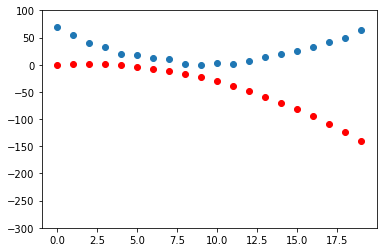

In [162]:
from fastai.torch_core import to_np

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red') # type: ignore convert tensor to numpy array
    ax.set_ylim(-300, 100)

# when we graph the random predictions, it looks like our roller coaster is
# going backwards lol
show_preds(preds)

In [163]:
# calculate the gradient, or an approximation of how the parameters need to change
loss.backward()
params.grad


tensor([-160.8866,  -10.1976,   -0.7828])

In [164]:
params.grad * 1e-5 # type: ignore 1e-5 = 0.00001

tensor([-1.6089e-03, -1.0198e-04, -7.8281e-06])

In [165]:
params

tensor([-0.4749,  1.6640,  0.0110], requires_grad=True)

In [166]:
# step the weights in the direction of the gradient
lr = 1e-5
params.data -= lr * params.grad.data # type: ignore
params.grad = None # type: ignore


In [167]:
preds = f_approx_speed(time, params)
mse(preds, speed)

tensor(87.4472, grad_fn=<SqrtBackward0>)

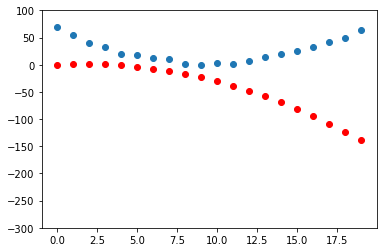

In [168]:
show_preds(preds)

In [169]:
def apply_step(params, prn=True):
    preds = f_approx_speed(time, params)
    loss = mse(preds, speed)
    loss.backward()
    lr = 1e-3 # TODO : why is this a good learning rate? brute force p-hacked from 1e-5 => 1e-3
    params.data -= lr * params.grad.data
    params.grad = None
    if prn : 
        print(f'apply_step : loss.item => {loss.item()} params.data => {params.data}')
    return preds

In [121]:
# repeat the process
'''
for i in range(10):
    preds = apply_step(params)
'''

apply_step : loss.item => 246.60560607910156 params.data => tensor([-1.1157, -0.6808, -0.5352])
apply_step : loss.item => 218.66038513183594 params.data => tensor([-0.9490, -0.6701, -0.5344])
apply_step : loss.item => 190.80125427246094 params.data => tensor([-0.7827, -0.6594, -0.5336])
apply_step : loss.item => 163.07028198242188 params.data => tensor([-0.6169, -0.6487, -0.5328])
apply_step : loss.item => 135.54165649414062 params.data => tensor([-0.4521, -0.6381, -0.5320])
apply_step : loss.item => 108.35857391357422 params.data => tensor([-0.2888, -0.6275, -0.5312])
apply_step : loss.item => 81.83367919921875 params.data => tensor([-0.1290, -0.6172, -0.5304])
apply_step : loss.item => 56.772586822509766 params.data => tensor([ 0.0219, -0.6074, -0.5295])
apply_step : loss.item => 35.693946838378906 params.data => tensor([ 0.1424, -0.5994, -0.5287])
apply_step : loss.item => 25.388975143432617 params.data => tensor([ 0.1777, -0.5969, -0.5281])


apply_step : loss.item => 87.44715118408203 params.data => tensor([-0.3124,  1.6743,  0.0118])
apply_step : loss.item => 61.950103759765625 params.data => tensor([-0.1587,  1.6840,  0.0125])
apply_step : loss.item => 39.61209487915039 params.data => tensor([-0.0279,  1.6921,  0.0133])
apply_step : loss.item => 26.344114303588867 params.data => tensor([0.0285, 1.6953, 0.0138])


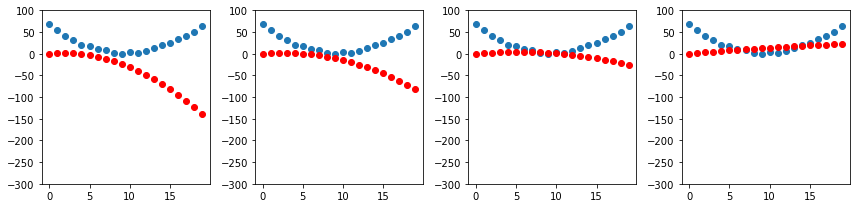

In [170]:
_,axs = plt.subplots(1, 4, figsize=(12,3))
for ax in axs:
    show_preds(apply_step(params, True), ax)
# TODO : why doen't this show a larger convergence? why does it look like it's still
# Answer : needed to comment out # repeat the process cell
plt.tight_layout()